In [1]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(점포-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(140497, 14)

In [2]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110001

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

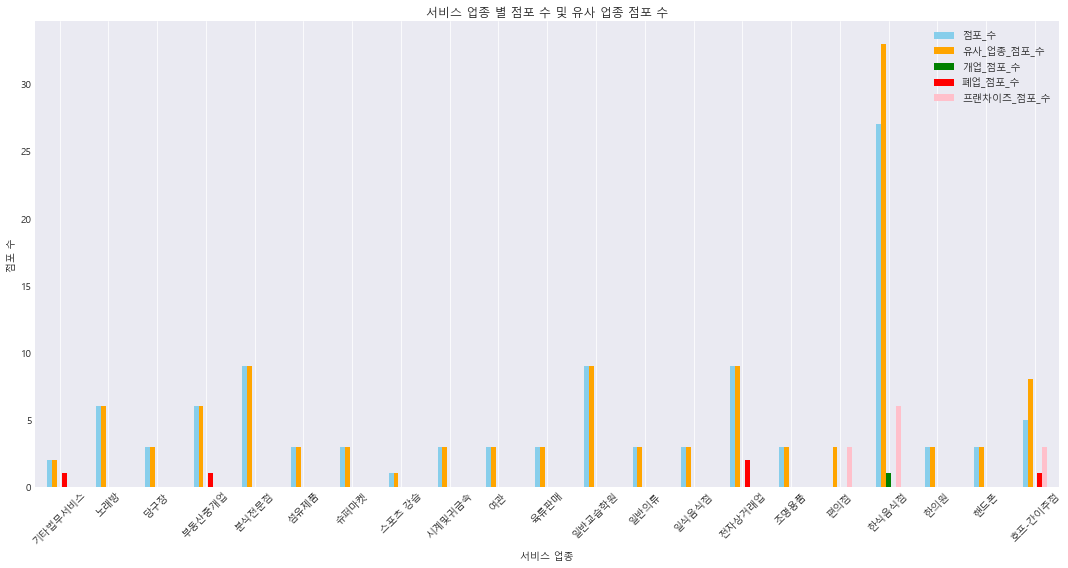

In [3]:
#이게 필요할까? => 표로 보여주는게 좋을 것 같음
# 데이터
store_data = target_market_data.groupby('서비스_업종_코드_명')[['점포_수', '유사_업종_점포_수', '개업_점포_수','폐업_점포_수', '프랜차이즈_점포_수']].sum()

# 그래프 생성
fig, ax = plt.subplots(figsize=(15, 8))
store_data.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red', 'pink'], ax=ax)
ax.set_title('서비스 업종 별 점포 수 및 유사 업종 점포 수')
ax.set_xlabel('서비스 업종')
ax.set_ylabel('점포 수')
ax.set_xticklabels(store_data.index, rotation=45)
ax.grid(axis='y')

# 그래프 레이아웃 최적화
fig.tight_layout()

# 그래프 출력
plt.show()

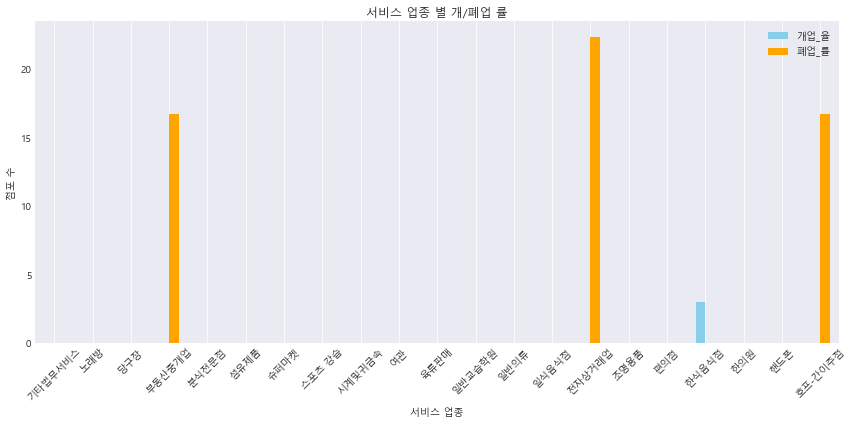

In [4]:
# 데이터
store_data = target_market_data.groupby('서비스_업종_코드_명')[['개업_율', '폐업_률']].mean()

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))
store_data.plot(kind='bar', color=['skyblue', 'orange'], ax=ax)
ax.set_title('서비스 업종 별 개/폐업 률')
ax.set_xlabel('서비스 업종')
ax.set_ylabel('점포 수')
ax.set_xticklabels(store_data.index, rotation=45)
ax.grid(axis='y')

# 그래프 레이아웃 최적화
fig.tight_layout()

# 그래프 출력
plt.show()

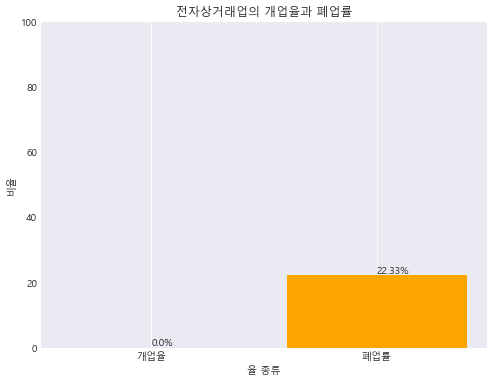

In [5]:
# 특정 업종 코드명
specific_service = '전자상거래업'

# 특정 업종에 해당하는 데이터 추출
specific_data = target_market_data[target_market_data['서비스_업종_코드_명'] == specific_service]

# 개업율과 폐업률 데이터 추출
open_rate = specific_data['개업_율'].mean()
close_rate = specific_data['폐업_률'].mean()

# 차트 생성
plt.figure(figsize=(8, 6))

# 막대 차트 그리기
bars = plt.bar(['개업율', '폐업률'], [open_rate, close_rate], color=['skyblue', 'orange'])

# 각 막대 위에 값을 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,f'{round(yval, 2)}%', va='bottom')

# 제목과 축 레이블 추가
plt.title(f'{specific_service}의 개업율과 폐업률')
plt.xlabel('율 종류')
plt.ylabel('비율')

# y 축 범위 설정
plt.ylim(0, 100)

# 그리드 추가
plt.grid(axis='y')

# 차트 출력
plt.show()